### importing



In [1]:
import pandas as pd

In [2]:
# reading information from URL

In [3]:
names_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
names_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [4]:
names_f.sample(5)


,nome,regiao,freq,rank,sexo
162,ESTER,0,99770,163,F
63,ERICA,0,231088,64,F
60,SARA,0,233349,61,F
132,GABRIELE,0,122545,133,F
170,MARINALVA,0,93355,171,F


In [5]:
names_m.sample(5)

,nome,regiao,freq,rank,sexo
178,DENILSON,0,74095,179,M
120,EDILSON,0,123872,121,M
61,CICERO,0,247711,62,M
183,MARLON,0,72507,184,M
17,FELIPE,0,615924,18,M


In [6]:
# checking number os entries on both DF:

print('The amount of entries is: '+ str(len(names_f) + len(names_m)))

# str will convert the values to string, without it a error will occour

The amount of entries is: 400


In [7]:
# merge both dF:
 
frames = [names_f, names_m]

In [8]:
names = pd.concat(frames)['nome'].to_frame() #to_frame() converts the result into a frame

In [9]:
names.sample(5)

,nome
97,BARBARA
42,MATHEUS
59,MANUEL
175,RIAN
179,LILIANE


# Adding ID to students

In [10]:
import numpy as np

In [11]:
students_total = len(names)

In [12]:
students_total

400

In [13]:
names['student ID'] = np.random.permutation(students_total ) + 1
# .random.permutation will set a random number to every student

In [14]:
names.sample(5)

,nome,student ID
47,JULIO,194
64,ROBSON,14
94,SABRINA,115
78,SILVIA,394
177,CLAUDINEI,36


In [15]:
# creating an email adress to every student:

domain = ['@emaildomain.com', '@emailservice.com']
names['domain'] = np.random.choice(domain, students_total) #we use .choice() when we want to set the parameters

In [16]:
names.sample(5)

,nome,student ID,domain
27,LUANA,128,@emaildomain.com
156,YASMIN,270,@emailservice.com
93,ELIANA,332,@emailservice.com
1,JOAO,32,@emaildomain.com
86,CRISTINA,284,@emailservice.com


In [17]:
# concatenating name and domain
names['email'] = names.nome.str.cat(names.domain).str.lower()
# .cat() to unite names and domain .str.lower() to keep everything lower case

In [18]:
names.sample(5)

,nome,student ID,domain,email
143,OTAVIO,307,@emailservice.com,otavio@emailservice.com
166,MICHEL,295,@emailservice.com,michel@emailservice.com
104,REINALDO,7,@emailservice.com,reinaldo@emailservice.com
30,ELIANE,86,@emaildomain.com,eliane@emaildomain.com
35,CARLA,176,@emailservice.com,carla@emailservice.com


# Creating Course Column

In [19]:
# installing libraries

!pip3 install html5lib
!pip3 install lxml

# I'm not sure, but this libraries must be installed using terminal, otherwise I got an error, I not sure why, maybe because of the virtual_area

In [20]:
import html5lib

In [21]:
# url courses option list

url = 'http://tabela-cursos.herokuapp.com/index.html'

In [22]:
courses = pd.read_html(url)

In [23]:
courses

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [24]:
type(courses)

list

In [25]:
# converting to a dataframe

courses = courses[0]

In [26]:
courses.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [27]:
# deleting spaces between words 'Nome do curso'

courses = courses.rename(columns = {'Nome do curso': 'course_name'})

In [28]:
courses.sample(5)

,course_name
13,Desenvolvendo jogos
17,Programação funcional
5,PHP com MySql
8,TDD com Java
19,Orientação objetos com Java


In [29]:
# creating courses ID:

courses['Course ID'] = courses.index + 1

In [30]:
courses.head(5)

,course_name,Course ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [31]:
# setting id as index for courses:

courses = courses.set_index('Course ID')

In [32]:
courses.head(3)

,course_name
Course ID,
1,Lógica de programação
2,Java para Web
3,C# para Web


# enrolling students



In [33]:
# more students usually are enrolled in one or two courses and less in three or more

In [34]:
names['Enrol'] = np.ceil(np.random.exponential(size = students_total)* 1.5).astype(int)
# .exponential() will provide the distribution above based on the number of students
# .ceil() will eliminate 0's

In [35]:
names.head(5)

,nome,student ID,domain,email,Enrol
0,MARIA,361,@emailservice.com,maria@emailservice.com,3
1,ANA,38,@emaildomain.com,ana@emaildomain.com,5
2,FRANCISCA,57,@emailservice.com,francisca@emailservice.com,3
3,ANTONIA,225,@emaildomain.com,antonia@emaildomain.com,1
4,ADRIANA,152,@emailservice.com,adriana@emailservice.com,1


In [36]:
names.Enrol.describe()

count    400.000000
mean       2.065000
std        1.588106
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max       13.000000
Name: Enrol, dtype: float64

In [37]:
# ploting graph

In [38]:
import seaborn as sns

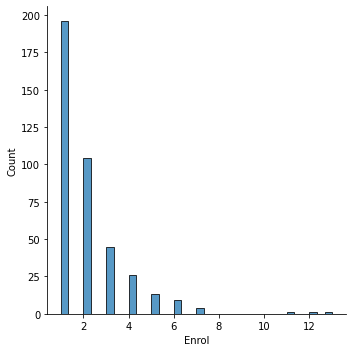

In [39]:
sns.displot(names.Enrol)

In [40]:
# checking the number of students per enrol

In [41]:
names.Enrol.value_counts()

1     196
2     104
3      45
4      26
5      13
6       9
7       4
13      1
11      1
12      1
Name: Enrol, dtype: int64

# Selecting courses per student

In [42]:
# creating a function to calculate the random probability:

all_classes = []
x = np.random.rand(20) #random number based on a list of 20 values (we have 20 different courses)
prob = x / sum(x)

In [51]:
#searhing in every line of datafra for the name and id_student in order to know the number of courses enrolled 
#we need to search using a for Iterator that will search the index and the line we need, to do that we use the function .iterrrows()
# for every check, we keep the id of the student using row.student_ID and the amout of enrols using row.Enrol

for index, row in names.iterrows():
    id = row['student ID']
    enrolled = row.Enrol
    for i in range(enrolled):
        erwl = [id, np.random.choice(courses.index, p = prob)]
        all_classes.append(erwl)
        
# We this information we need to decide the number of courses. To do that we use a new for that will search every 'i'element
# on the range(enrolled)(values between 0 and the number of enrrols/student). That we have a variable erwl that will keep the 
#student_ID and the Course ID, all randomly using np.random.choice(), that will recieve the Parameters (courses.index) with the
# couse index and the variable probabilistic prob (x / sum(x))
# Finally we get the values and store it on an array  called all_erwl

enrolled = pd.DataFrame(all_classes, columns = ['student_ID', 'Course ID'])

In [52]:
enrolled.head(5)

,student_ID,Course ID
0,361,8
1,361,11
2,361,1
3,38,11
4,38,11


In [59]:
# Based on the dataFrame enrolled, we call the function groupby() using 'Course ID' as column.
# After that we call the function count() to count the number of enrols
# We use the function join() to unite the information to the dataframe courses, using course_name as index. 

enrolled.groupby('Course ID').count().join(courses['course_name'])

,student_ID,course_name
Course ID,,
1,200,Lógica de programação
2,178,Java para Web
3,199,C# para Web
4,149,Ruby on Rails
5,42,Cursos de Python
6,57,PHP com MySql
7,179,.NET para web
8,186,Novas integrações com Java
9,133,TDD com Java


In [64]:
# the student_ID actually refers to the amount of students enrolled in that particular class, so we have to change the name

enrolled_by_class = enrolled.groupby('Course ID').count().join(courses['course_name']).rename(columns={'student_ID':'Number_of_Students'})

In [65]:
enrolled_by_class.head(5)

,Number_of_Students,course_name
Course ID,,
1,200,Lógica de programação
2,178,Java para Web
3,199,C# para Web
4,149,Ruby on Rails
5,42,Cursos de Python


# Exporting to different formats


In [66]:
# to csv:

enrolled_by_class.to_csv('enrolled_by_course.csv', sep =';' , index = False)

In [69]:
# to json: 

enrolled_by_class.to_json('enrolled_by_course.json')

In [70]:
# to HTML:

enrolled_by_class.to_html('enrolled_by_course.html')